In [1]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/combinedData.csv')
target = pd.read_csv('../data/combinedTarget.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = data.merge(target, how='left',on=['Provider','Set'])

In [4]:
data.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'], inplace=True)

In [5]:
mba = pd.read_csv('../data/mba.csv')

In [12]:
mba

,Unnamed: 0,BeneID,ClaimID,conditions,confidence,lift
Provider,,,,,,
PRV51003,4,4,4,4,4,4
PRV51004,7,7,7,7,7,7
PRV51005,52,52,52,52,52,52
PRV51007,1,1,1,1,1,1
PRV51011,3,3,3,3,3,3
...,...,...,...,...,...,...
PRV57756,2,2,2,2,2,2
PRV57759,2,2,2,2,2,2
PRV57760,1,1,1,1,1,1


In [9]:
data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,60,70,0,7,0,10,7.0,7,66.0,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,60,70,0,7,1,4,3.0,3,67.0,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,60,70,0,7,0,7,4.0,4,67.0,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,250,320,0,6,1,10,9.0,9,95.0,No
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,250,320,0,6,0,6,NaN,1,95.0,No


In [10]:
data.shape

(693603, 64)

In [13]:
data.melt(id_vars=['Provider','ClaimID'], value_vars=['AttendingPhysician','OperatingPhysician','OtherPhysician']).rename(columns=str.title)

,Provider,Claimid,Variable,Value
0,PRV55912,CLM46614,AttendingPhysician,Dr. Gabriele Jockel
1,PRV55907,CLM66048,AttendingPhysician,Dr. Swen Trujillo
2,PRV56046,CLM68358,AttendingPhysician,Dr. Horst-Dieter Chapman
3,PRV52405,CLM38412,AttendingPhysician,Dr. Gerónimo Mülichen
4,PRV52314,CLM144521,AttendingPhysician,Dr. William Norton
...,...,...,...,...
2080804,PRV55485,CLM469576,OtherPhysician,NaN
2080805,PRV55485,CLM483842,OtherPhysician,NaN
2080806,PRV55485,CLM554925,OtherPhysician,NaN
2080807,PRV55889,CLM347777,OtherPhysician,Dr. Lori Mcgrath


In [ ]:
tidy = data.melt(id_vars='Provider').rename(columns=str.title)


In [14]:
data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Set', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stro

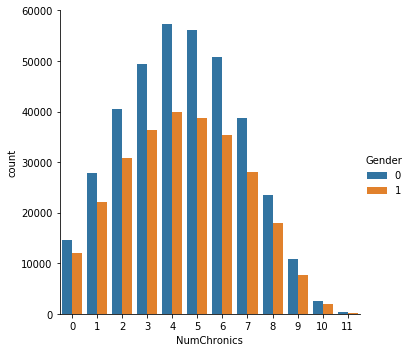

In [641]:
sns.catplot(#y='InscClaimAmtReimbursed',
                x='NumChronics',
                hue='Gender',
            kind='count',
                data=outpat)

## Aiko Questions

### Set 1

1. How many medical doctors are there in the train outpatient dataset?

In [629]:
train_docs = data[data.Set=='Train']

np.unique(train_docs[data.Status=='out'][['AttendingPhysician','OperatingPhysician','OtherPhysician']].fillna('').values.flatten()).shape

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(89771,)

2. How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?

In [630]:
np.unique(train_docs[data.Status=='in'][['AttendingPhysician','OperatingPhysician','OtherPhysician']].fillna('').values.flatten()).shape

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(18257,)

3. Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [640]:
inpat = data[data.Status=='in']
outpat = data[data.Status=='out']

Let's count how many cases of chronic conditions exist in both inpatient and outpatient

In [633]:
chronic_count = data.groupby(['Status'])[['Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke']].sum().reset_index()
chronic_count

,Status,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke
0,in,25095,36071,30125,9542,23999,25173,40004,42774,17534,18000,8513
1,out,253832,374002,256175,95917,192882,276103,449647,483902,202613,197681,62427


In [5]:
chronic_count['total'] =chronic_count.sum(axis=1)

NameError: name 'chronic_count' is not defined

In [363]:
chronic_prop = chronic_count.iloc[:,1:].div(chronic_count.total, axis=0)
chronic_prop.index = ['in','out']

In [364]:
chronic_prop = chronic_prop.reset_index()
chronic_prop.drop(columns=['total'],axis=1,inplace=True)

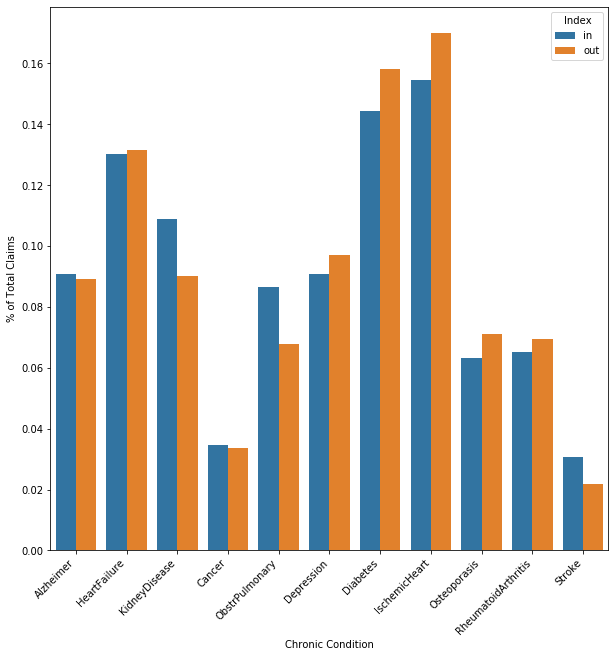

In [365]:
fig, ax1 = plt.subplots(figsize=(10, 10))

tidy = chronic_prop.melt(id_vars='index').rename(columns=str.title)

ax = sns.barplot(hue='Index', y='Value', x='Variable', data=tidy, ax=ax1)
#sns.despine(fig)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
ax.set(xlabel='Chronic Condition', ylabel='% of Total Claims');
ax.figure.savefig("./plots/cc_props.png",bbox_inches='tight')

In [21]:
df = data.groupby(['Age','Set'])[
    'KidneyDisease',
    #'IschemicHeart',
    #'Stroke'
].sum().reset_index()

In [24]:
#age_chronics = df.melt(id_vars=['Age','Set'])
df['KidneyDisease'] = (df['KidneyDisease'] - df['KidneyDisease'].mean())/df['KidneyDisease'].std()

In [27]:
df

,Age,Set,KidneyDisease
0,25.0,Test,-0.776261
1,25.0,Train,-0.761615
2,26.0,Test,-0.764544
3,26.0,Train,-0.695500
4,27.0,Test,-0.746551
...,...,...,...
149,99.0,Train,-0.182482
150,100.0,Test,-0.639009
151,100.0,Train,-0.218050
152,101.0,Test,-0.754083


Or do those who have more visits to the providers have worse health conditions?

In [1]:
bene_visits = data.groupby(['BeneID','NumChronics','Status'])['Provider'].count().reset_index()
# .agg({
#     'Provider' : 'count',
#     'Alzheimer' : 'sum',
#     'HeartFailure' : 'sum',
#     'KidneyDisease' : 'sum',
#     'Cancer' : 'sum',
#     'ObstrPulmonary' : 'sum',
#     'Depression' : 'sum',
#     'Diabetes' : 'sum',
#     'IschemicHeart' : 'sum',
#     'Osteoporasis' : 'sum',
#     'RheumatoidArthritis' : 'sum',
#     'Stroke' : 'sum'
# })
bene_visits.sample(10)

#bene_visits['total'] =chronic_count.sum(axis=1)

NameError: name 'data' is not defined

In [385]:
visits_conds = bene_visits.groupby(['Status','NumChronics','Provider']).count().reset_index()
visits_conds.sample(4)

,Status,NumChronics,Provider,BeneID
28,in,7,1,3155
252,out,7,23,6
346,out,11,14,2
15,in,4,4,7


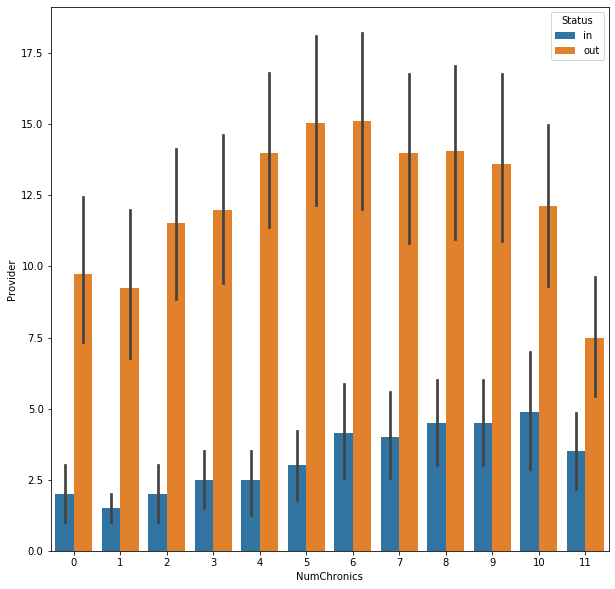

In [416]:
fig, ax1 = plt.subplots(figsize=(10, 10))

sns.barplot(hue='Status', x='NumChronics', y='Provider', data=visits_conds, ax=ax1)
#sns.despine(fig)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
#ax.set(xlabel='Chronic Condition', ylabel='% of Total Claims');

In [274]:
bene_health = bene_visits.merge(data[['BeneID','NumChronics']], on='BeneID', how='left')
bene_health.shape

(922904, 4)

In [275]:
bene_health = bene_health.groupby(['Status','Provider','NumChronics']).count().reset_index()
bene_health.shape

(347, 4)

In [276]:
bene_health

,Status,Provider,NumChronics,BeneID
0,in,1,0,933
1,in,1,1,4194
2,in,1,2,9629
3,in,1,3,16468
4,in,1,4,24046
...,...,...,...,...
342,out,28,6,87
343,out,28,8,31
344,out,28,9,59
345,out,30,5,30


4. How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

In [428]:
print('There are {} distinct Beneficiary IDs in the inpatient dataset'.format(inpat.BeneID.drop_duplicates().shape[0]))
print('There are {} distinct Beneficiary IDs in the outpatient dataset'.format(outpat.BeneID.drop_duplicates().shape[0]))

There are 37418 distinct Beneficiary IDs in the inpatient dataset
There are 144189 distinct Beneficiary IDs in the outpatient dataset


5. Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

In [511]:
data.groupby('Provider')['AttendingPhysician'].count().reset_index()

,Provider,AttendingPhysician
0,PRV51001,25
1,PRV51002,205
2,PRV51003,132
3,PRV51004,149
4,PRV51005,1165
...,...,...
6758,PRV57759,28
6759,PRV57760,22
6760,PRV57761,82
6761,PRV57762,1


In [658]:
doctor_group = data.groupby(['AttendingPhysician','OperatingPhysician','OtherPhysician'])

doctors_summary = doctor_group.agg({
    'BeneID' : 'count', 
    'ClaimID' : 'count',
    'Provider': 'nunique',
    'InscClaimAmtReimbursed' : 'mean',
    'DeductibleAmtPaid': 'median', 
    'Race': 'median',
    'RenalDiseaseIndicator': 'sum', 
    'Alzheimer': 'sum', 
    'HeartFailure': 'sum', 
    'KidneyDisease': 'sum',
    'Cancer': 'sum', 
    'ObstrPulmonary': 'sum', 
    'Depression': 'sum', 
    'Diabetes': 'sum', 
    'IschemicHeart': 'sum',
    'Osteoporasis': 'sum', 
    'RheumatoidArthritis': 'sum', 
    'Stroke': 'sum',
    'IPAnnualReimbursementAmt': 'mean', 
    'IPAnnualDeductibleAmt': 'mean',
    'OPAnnualReimbursementAmt': 'mean', 
    'OPAnnualDeductibleAmt': 'mean', 
    'WhetherDead': 'sum',
    'NumProc': 'median', 
    'NumClaims' : 'median', 
    'AdmissionDays': 'median', 
    'ClaimDays': 'median', 
    'Age' : 'median',
    'NumChronics': 'median'
}).reset_index()
doctors_summary.head(10)

,AttendingPhysician,OperatingPhysician,OtherPhysician,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Race,RenalDiseaseIndicator,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumProc,NumClaims,AdmissionDays,ClaimDays,Age,NumChronics
0,,,,1823,1823,1104,985.68294,0.0,1.0,449,...,764.936917,2143.422929,645.359298,19,0.0,3.0,6.0,1.0,75.0,5.0
1,,,Dr. Beth Benthin,1,1,1,500.00000,70.0,1.0,0,...,0.000000,3170.000000,1050.000000,0,0.0,3.0,NaN,1.0,58.0,3.0
2,,,Dr. Dorit Marín,2,2,1,1200.00000,10.0,1.0,1,...,534.000000,5835.000000,1595.000000,0,0.0,6.5,NaN,11.0,79.0,7.5
3,,,Dr. Eugenia Mitchell,1,1,1,300.00000,0.0,1.0,0,...,0.000000,1140.000000,500.000000,0,0.0,4.0,NaN,1.0,68.0,4.0
4,,,Dr. Evelio Ray,1,1,1,30.00000,0.0,1.0,0,...,1068.000000,2230.000000,310.000000,0,0.0,1.0,NaN,1.0,61.0,2.0
5,,,Dr. Gabriel Harloff,1,1,1,10.00000,0.0,5.0,0,...,0.000000,3640.000000,870.000000,0,0.0,3.0,NaN,1.0,78.0,5.0
6,,,Dr. Hunter Meraz,1,1,1,40.00000,0.0,1.0,0,...,0.000000,1180.000000,140.000000,0,0.0,2.0,NaN,1.0,74.0,2.0
7,,,Dr. Ingrid Daniels,1,1,1,10.00000,0.0,1.0,0,...,0.000000,1260.000000,310.000000,0,0.0,4.0,NaN,1.0,74.0,2.0
8,,,Dr. Karina Franklin,1,1,1,60.00000,0.0,1.0,1,...,0.000000,6590.000000,1790.000000,0,0.0,2.0,NaN,1.0,82.0,7.0
9,,,Dr. Kimberly Kusch,1,1,1,1800.00000,0.0,1.0,1,...,0.000000,9590.000000,4070.000000,0,0.0,4.0,NaN,17.0,76.0,6.0


In [660]:
doctors_summary.sort_values('BeneID',ascending=False)

,AttendingPhysician,OperatingPhysician,OtherPhysician,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Race,RenalDiseaseIndicator,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumProc,NumClaims,AdmissionDays,ClaimDays,Age,NumChronics
0,,,,1823,1823,1104,985.682940,0.0,1.0,449,...,764.936917,2143.422929,645.359298,19,0.0,3.0,6.0,1.0,75.0,5.0
198716,Dr. Thomas Benavídez,,,1332,1332,1,242.545045,0.0,1.0,236,...,427.897898,2276.201201,656.358859,15,0.0,2.0,NaN,1.0,73.0,4.0
35965,Dr. Celia Brown,,,874,874,1,256.189931,0.0,1.0,192,...,443.093822,2318.524027,606.800915,7,0.0,2.0,NaN,1.0,76.0,4.0
103949,Dr. Jessica Long,,,813,813,1,225.719557,0.0,1.0,167,...,463.119311,2053.419434,626.986470,9,0.0,2.0,NaN,1.0,75.0,4.0
107592,Dr. Jolanthe Reising,,,661,661,1,246.913767,0.0,1.0,102,...,445.500756,2314.629349,623.101362,4,0.0,2.0,NaN,1.0,74.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92967,Dr. Isaac Villegas,Dr. Marcela Curiel,Dr. Jesse Zimmer,1,1,1,8000.000000,1068.0,1.0,0,...,1068.000000,440.000000,140.000000,0,1.0,10.0,9.0,9.0,71.0,4.0
92968,Dr. Isaac Watson,,,1,1,1,0.000000,0.0,1.0,0,...,0.000000,30.000000,100.000000,0,0.0,1.0,NaN,1.0,88.0,3.0
92969,Dr. Isaac Watson,,Dr. Isaac Watson,1,1,1,400.000000,0.0,1.0,1,...,0.000000,2690.000000,910.000000,0,0.0,1.0,NaN,1.0,81.0,7.0
92970,Dr. Isaac Weaver,,,1,1,1,10.000000,0.0,1.0,1,...,0.000000,220.000000,0.000000,0,0.0,3.0,NaN,1.0,78.0,4.0


In [735]:
doctors_claims=doctors_claims.rename(columns = {"ClaimID":'ClaimsFiled'})

In [588]:
tidy = doctors_providers.melt(id_vars='Provider').rename(columns=str.title)
#tidy
doc_providers = tidy.groupby('Value')['Provider'].sum().reset_index().sort_values('Provider',ascending=False).reset_index(drop=True)

In [589]:
doc_providers

,Value,Provider
0,,999053
1,Dr. Edward Paz,2958
2,Dr. Andrea Saiz,2813
3,Dr. Zacarías Lee,2459
4,Dr. Stella Montaño,2423
...,...,...
123154,Dr. Jo King,1
123155,Dr. Jo Liebelt,1
123156,Dr. Jo Losekann,1
123157,Dr. Jo Montalvo,1


In [ ]:

# sns.scatterplot(x = doc_providers.index,
#                 y = 'Value',
#                 data=doc_providers)

6. Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

7. Do the same providers provide both inpatient and outpatient services? Summarize your finding.

8. Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [544]:
np.unique(data['OperatingPhysician'].values.flatten())

array(['', 'Dr. Aaron Adler', 'Dr. Aaron Alvarez', ...,
       'Dr. Úrsula Tucker', 'Dr. Úrsula Yang',
       'Dr. Úrsula auch Schlauchin'], dtype=object)

In [47]:
docMelt = doctors_claims.melt(id_vars=['State','Provider','PotentialFraud','ClaimID','AttendingPhysician']).rename(columns=str.title)

In [48]:
docMelt.sample(4)

,State,Provider,Potentialfraud,Claimid,Attendingphysician,Variable,Value
513558,10,PRV54955,Yes,1,Dr. Camila Smith,OtherPhysician,Dr. Camila Smith
181180,13,PRV52019,Yes,1,Dr. Cheryl Ornelas,OperatingPhysician,Dr. Inés Little
135355,20,PRV52032,Yes,1,Dr. Urte Mccoy,OperatingPhysician,Dr. Urszula Wagenknecht
200209,54,PRV56177,No,1,Dr. Destiny Reyes,OperatingPhysician,Dr. Detlev Villarreal


In [50]:
docMelt.columns = ['State','Provider', 'PotentialFraud', 'ClaimsFiled', 'Doc1',
       'Connection', 'Doc2']
docMelt.sample(3)

,State,Provider,PotentialFraud,ClaimsFiled,Doc1,Connection,Doc2
193229,5,PRV51640,No,1,Dr. Daniel Centeno,OperatingPhysician,Dr. Elizabeth Dörr
215529,42,PRV55239,No,1,Dr. Katherine Rojas,OperatingPhysician,Dr. Katherine Schuster
507403,2,PRV57303,No,1,Dr. Israel Jasso,OtherPhysician,Dr. Israel Jasso


In [741]:
doctors_claims

,AttendingPhysician,OperatingPhysician,OtherPhysician,Provider,PotentialFraud,State,ClaimsFiled
25590,Dr. Reni Schüler,,Dr. Friedlinde Müller,PRV57103,Yes,46,4
239554,Dr. Jason Woods,Dr. Jason Woods,Dr. Nikolaus Báez,PRV55190,?,42,1
147672,Dr. Renato Webb,,,PRV52351,No,1,1


In [4]:
data = pd.read_csv('./data/combinedData.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Possible Routes

- Link providers by physicians
    - Physicians who work for multiple providers
- Links by patients 
    - problematic
- Link by shared codes
    - can target specialties by looking at code classes (all psychiatric codes start with V)
- Link by referrels (from one attending physician to an operating or other physician)

- Time Series
    - how many codes whether diagnostic or procedural are happening per visit
- Look at multiple claims for single patients

Fraud Tactics
- providers break up multiple diagnosis codes into multiple claims across multiple days (**unbundling**)
    - examples
        - 5 diagnostics codes for provider A with one claim, provider B has one code for 5 claims
            - facility charge accumulates per visit
        
- throwing in fraudulent charges
    - putting in a charge related to the condition (with a diagnosis code)
    - putting in codes related to a patient condition but at a higher frequency relative to other providers
    
    
- inpatient data
 - incidences of 8 claims


In [6]:
target = pd.read_csv('./data/combinedTarget.csv')

In [7]:
data = data.merge(target, on=['Provider','Set'], how='left')

In [16]:
data.drop(columns=['Unnamed: 0_y','Unnamed: 0_x'], inplace=True)

In [29]:
data.fillna('',inplace=True)

In [45]:
doctors_claims = data.groupby(['AttendingPhysician','OperatingPhysician','OtherPhysician','Provider','PotentialFraud','State'])[['ClaimID']].nunique().reset_index().sort_values('ClaimID', ascending=False).reset_index(drop=True)
doctors_claims.head(10)

,AttendingPhysician,OperatingPhysician,OtherPhysician,Provider,PotentialFraud,State,ClaimID
0,Dr. Thomas Benavídez,,,PRV53918,Yes,23,1298
1,Dr. Celia Brown,,,PRV54813,No,31,864
2,Dr. Jessica Long,,,PRV51567,Yes,5,808
3,Dr. Jolanthe Reising,,,PRV53797,Yes,22,637
4,Dr. Bryan Langern,,,PRV51459,Yes,5,629
5,Dr. Gotthard Fuller,,,PRV51459,Yes,5,604
6,Dr. Karina Franklin,,,PRV51459,Yes,5,602
7,Dr. Jessica Langern,,,PRV51459,Yes,5,599
8,Dr. Emilio Ramírez,,,PRV51459,Yes,5,589
9,Dr. Evelio Newman,,,PRV51196,No,3,587


In [46]:
doctors_claims=doctors_claims.replace('',None, regex=True)

In [33]:
doctors_claims['Docs'] = doctors_claims[['AttendingPhysician','OperatingPhysician','OtherPhysician']].values.tolist()


#doctors_claims['Docs'] = doctors_claims['Docs'].apply(set)

In [37]:
doctors_claims.shape

(262617, 8)

In [41]:
doctors_claims.head(20)

,AttendingPhysician,OperatingPhysician,OtherPhysician,Provider,PotentialFraud,State,ClaimID,Docs
0,Dr. Thomas Benavídez,,,PRV53918,Yes,23,1298,"{, Dr. Thomas Benavídez}"
1,Dr. Celia Brown,,,PRV54813,No,31,864,"{, Dr. Celia Brown}"
2,Dr. Jessica Long,,,PRV51567,Yes,5,808,"{, Dr. Jessica Long}"
3,Dr. Jolanthe Reising,,,PRV53797,Yes,22,637,"{, Dr. Jolanthe Reising}"
4,Dr. Bryan Langern,,,PRV51459,Yes,5,629,"{, Dr. Bryan Langern}"
5,Dr. Gotthard Fuller,,,PRV51459,Yes,5,604,"{Dr. Gotthard Fuller, }"
6,Dr. Karina Franklin,,,PRV51459,Yes,5,602,"{, Dr. Karina Franklin}"
7,Dr. Jessica Langern,,,PRV51459,Yes,5,599,"{, Dr. Jessica Langern}"
8,Dr. Emilio Ramírez,,,PRV51459,Yes,5,589,"{, Dr. Emilio Ramírez}"
9,Dr. Evelio Newman,,,PRV51196,No,3,587,"{, Dr. Evelio Newman}"


In [1]:
data

NameError: name 'data' is not defined